In [1]:
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import os
from helpers import *
from preprocessing import *
import pickle

In [2]:
#x_train, x_test, y_train, train_ids, test_ids=load_csv_data("data")

In [3]:
DATA_FOLDER = 'data/'

In [4]:
try:
    with open(DATA_FOLDER + 'x_train.pickle', 'rb') as f:
        x_train = pickle.load(f)
    with open(DATA_FOLDER + 'x_test.pickle', 'rb') as f:
        x_test = pickle.load(f)
    with open(DATA_FOLDER + 'y_train.pickle', 'rb') as f:
        y_train = pickle.load(f)
    with open(DATA_FOLDER + 'test_ids.pickle', 'rb') as f:
        test_ids = pickle.load(f)
    with open(DATA_FOLDER + 'names_map.pickle', 'rb') as f:
        names_map = pickle.load(f)
except:
    x_train, x_test, y_train, train_ids, test_ids = load_csv_data(DATA_FOLDER, sub_sample=False)

    names = np.genfromtxt(DATA_FOLDER + 'x_train.csv', delimiter=",", dtype=str, max_rows=1)
    names = np.delete(names, 0)
    names_map = {}
    for i in range(len(names)):
        names_map[names[i]] = i

    with open(DATA_FOLDER + 'x_train.pickle', 'wb') as f:
        pickle.dump(x_train, f)

    with open(DATA_FOLDER + 'x_test.pickle', 'wb') as f:
        pickle.dump(x_test, f)

    with open(DATA_FOLDER + 'y_train.pickle', 'wb') as f:
        pickle.dump(y_train, f)

    with open(DATA_FOLDER + 'test_ids.pickle', 'wb') as f:
        pickle.dump(test_ids, f)
    
    with open(DATA_FOLDER + 'names_map.pickle', 'wb') as f:
        pickle.dump(names_map, f)

## Preprocessing and Scalings

In [5]:
DATA_FOLDER = 'data/'

In [6]:
names = np.genfromtxt(DATA_FOLDER + 'x_train.csv', delimiter=",", dtype=str, max_rows=1)
names = np.delete(names, 0)
names_map = {}
for i in range(len(names)):
    names_map[names[i]] = i

In [7]:
y_train = np.where(y_train == -1, 0, y_train)
x_tr = x_train.copy()
y_tr = y_train.copy()


In [21]:
#clean the data and return the cleaned dataset, the y values, the mean and median dictionnaries to use to clean other sets (test set for example)
x_tr_clean, y_tr_clean, mean_dico, median_dico,intersting_features = clean_data(names_map, x_tr, y_tr, is_y=True, is_train_data=True)

#if we don't have the y values, we use is_y=False.
x_test_clean, _, _, _, _ = clean_data(names_map, x_test, y_raw=None, is_y=False, is_train_data=False, mean_dico=mean_dico, median_dico=median_dico)

#compute the scaled train dataset and the mean and std used for the scaling
x_tr_scaled, train_mean, train_std = scale_data(x_tr_clean, names_map, is_train_data=True)

#scale the test set using the mean and std computed on the train set
x_test_scaled, _, _ = scale_data(x_test_clean, names_map, is_train_data=False, train_mean=train_mean, train_std=train_std)

In [22]:
x_tr_scaled.shape

(328135, 321)

## Feature selection

We chose some initial features by reading the report and assessing how they seemed relevant for our predictions.

In [23]:
intersting_features_indexes=np.array([names_map[feature] for feature in intersting_features])

In [24]:
X_train=x_tr_scaled[:,intersting_features_indexes]
X_test=x_test_scaled[:,intersting_features_indexes]

#### By correlation with the output

In [25]:
# import seaborn  as sns

# plt.figure(figsize=(10,6))
# sns.heatmap(correlations,annot=False)

In [26]:
selected_features=intersting_features_indexes[:18].copy()

In [27]:
selected_features

array([26, 29, 30, 33, 35, 38, 27, 28, 39, 43, 45, 47, 48, 44, 40, 41, 42,
       46])

In [28]:
selected_features_names=list(np.array(intersting_features)[selected_features])

In [29]:
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

#### Build polynomial expension and interaction features

In [30]:
X_train.shape

(328135, 18)

In [31]:
X_train_poly,features_names=build_poly_expension_with_interaction_features(X_train,features_names=selected_features_names,max_degree=3)
X_test_poly,features_names=build_poly_expension_with_interaction_features(X_test,features_names=selected_features_names,max_degree=3)

In [32]:
X_train_poly.shape

(328135, 207)

#### Again selecting features with correlation with the outcome y

#### Ridge regression

(0.08830207079403295, 1.0, 0.16227492929349502)


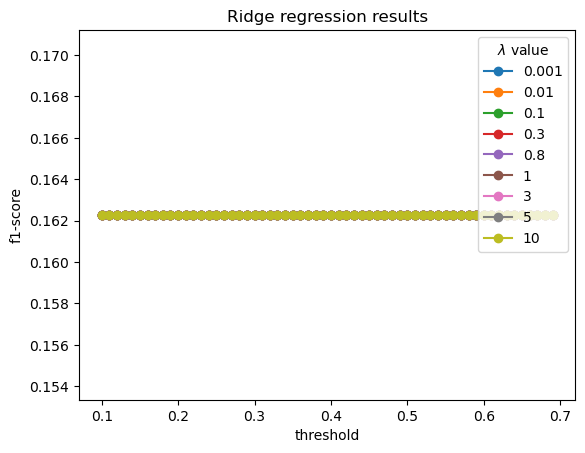

In [34]:
w_opt,loss=ridge_regression(y_tr_clean,X_train_poly,lambda_=0.01)
print(compute_scores_linear_model(X_train_poly,w_opt,y=y_tr_clean,threshold=0.3,apply_sigmoid=False))
thr_l=np.arange(0.1,0.7,0.01)
for lambda_ in [0.001,0.01,0.1,0.3,0.8,1,3,5,10]:
    w_opt,loss=ridge_regression(y_tr_clean,X_train_poly,lambda_=lambda_)
    
    f1_scores=[compute_scores_linear_model(X_train_poly,w_opt,y_tr_clean,threshold=t,apply_sigmoid=False)[2] for t in thr_l]
    plt.plot(thr_l,f1_scores,marker='o',label=str(lambda_))
    plt.xlabel("threshold")
    plt.ylabel("f1-score")
plt.legend(title="$\\lambda$ value")
plt.title("Ridge regression results")
plt.show()

In [35]:
w_opt

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na